In [21]:
# Movie Recommendation System - Exploratory Data Analysis
# This notebook explores the MovieLens 100K dataset

# %% [markdown]
# # 🎬 Movie Recommendation System - EDA
# 
# **Objective**: Understand the dataset through visualization and statistical analysis
# 
# **Contents**:
# 1. Load Data
# 2. Basic Statistics
# 3. Rating Distribution Analysis
# 4. User Behavior Analysis
# 5. Movie Popularity Analysis
# 6. Genre Analysis
# 7. Sparsity Analysis
# 8. Insights & Next Steps

# %%
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path


%matplotlib inline

# Add src to path to import config
sys.path.append(str(Path.cwd().parent / 'src'))
import config

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully!")

# %% [markdown]
# ## 1. Load Processed Data

# %%
# Load processed data
ratings = pd.read_csv(config.PROCESSED_DATA_DIR / 'ratings_clean.csv')
movies = pd.read_csv(config.PROCESSED_DATA_DIR / 'movies_clean.csv')
users = pd.read_csv(config.PROCESSED_DATA_DIR / 'users_clean.csv')

print(f"Ratings shape: {ratings.shape}")
print(f"Movies shape: {movies.shape}")
print(f"Users shape: {users.shape}")

# Display first few rows
print("\n📊 Sample Ratings:")
display(ratings.head())

print("\n📊 Sample Movies:")
display(movies.head())

# %% [markdown]


✓ Libraries imported successfully!
Ratings shape: (97953, 4)
Movies shape: (1682, 24)
Users shape: (943, 5)

📊 Sample Ratings:


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596



📊 Sample Movies:


,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# ## 2. Basic Statistics

# %%
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"Total Ratings: {len(ratings):,}")
print(f"Unique Users: {ratings['user_id'].nunique():,}")
print(f"Unique Movies: {ratings['movie_id'].nunique():,}")
print(f"Rating Range: {ratings['rating'].min()} - {ratings['rating'].max()}")
print(f"Average Rating: {ratings['rating'].mean():.2f}")
print(f"Median Rating: {ratings['rating'].median():.1f}")



DATASET OVERVIEW
Total Ratings: 97,953
Unique Users: 943
Unique Movies: 1,152
Rating Range: 1 - 5
Average Rating: 3.55
Median Rating: 4.0


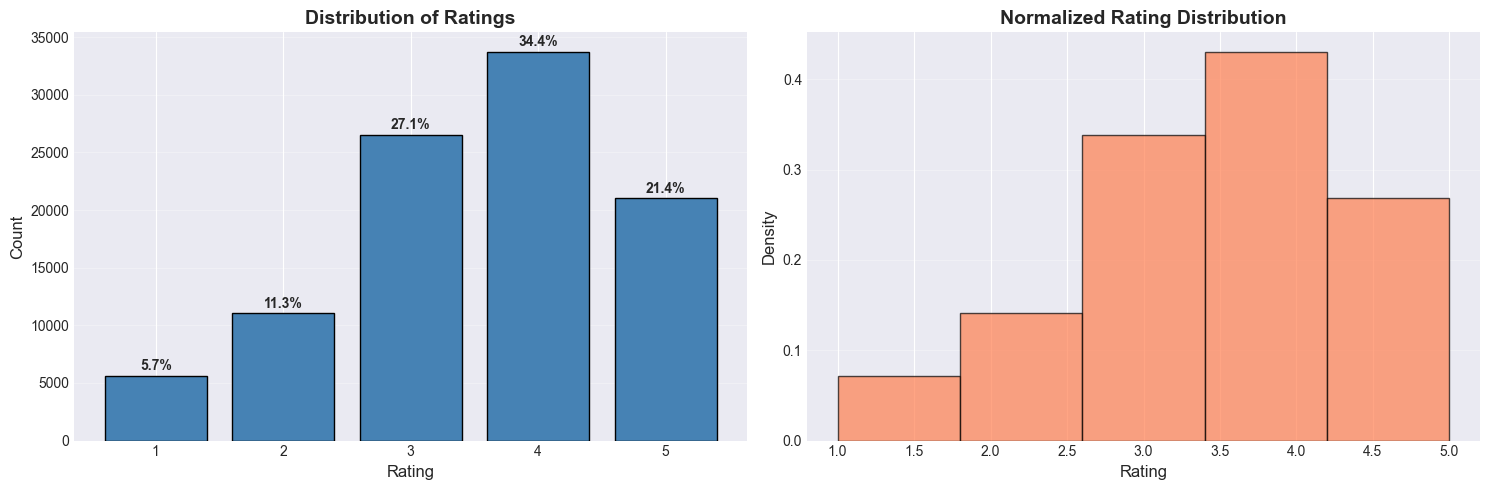

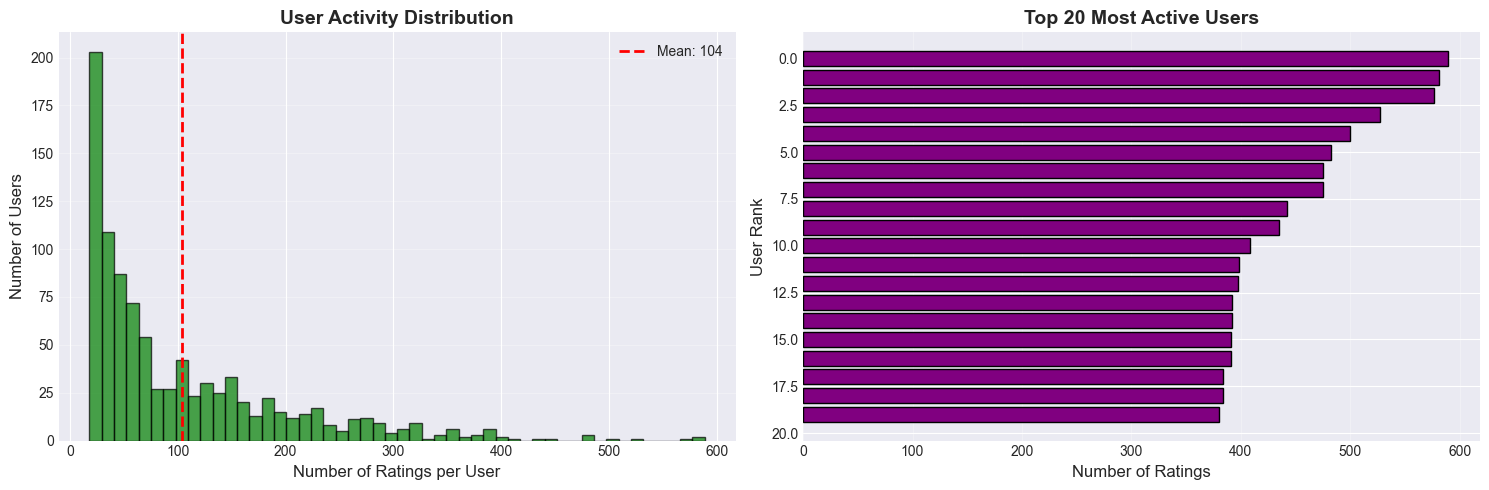

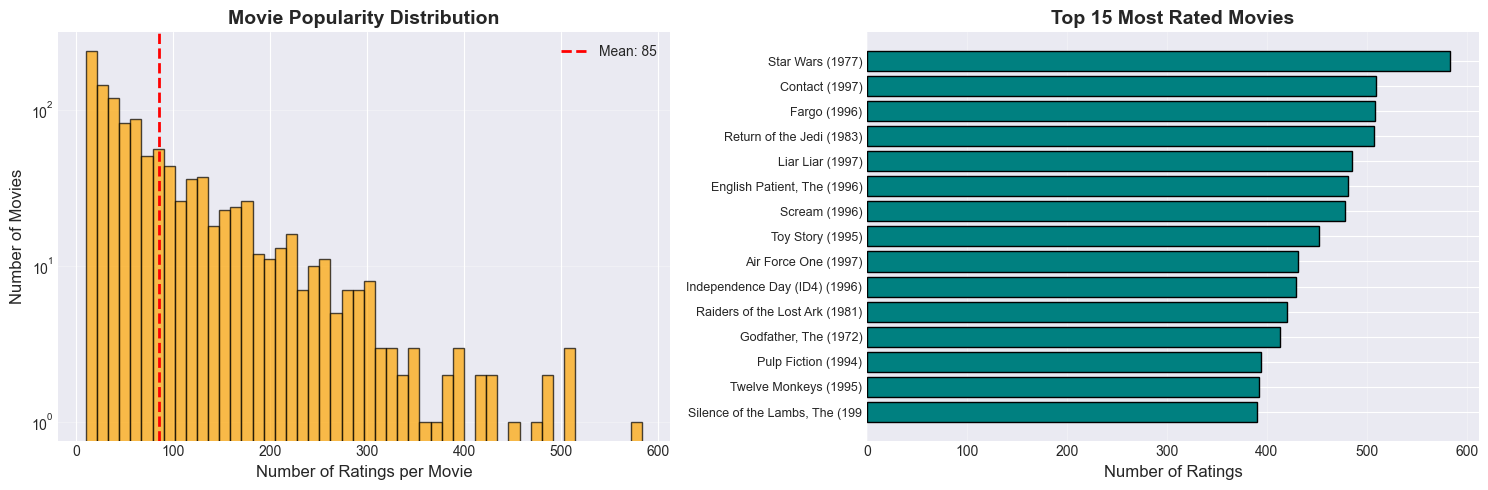

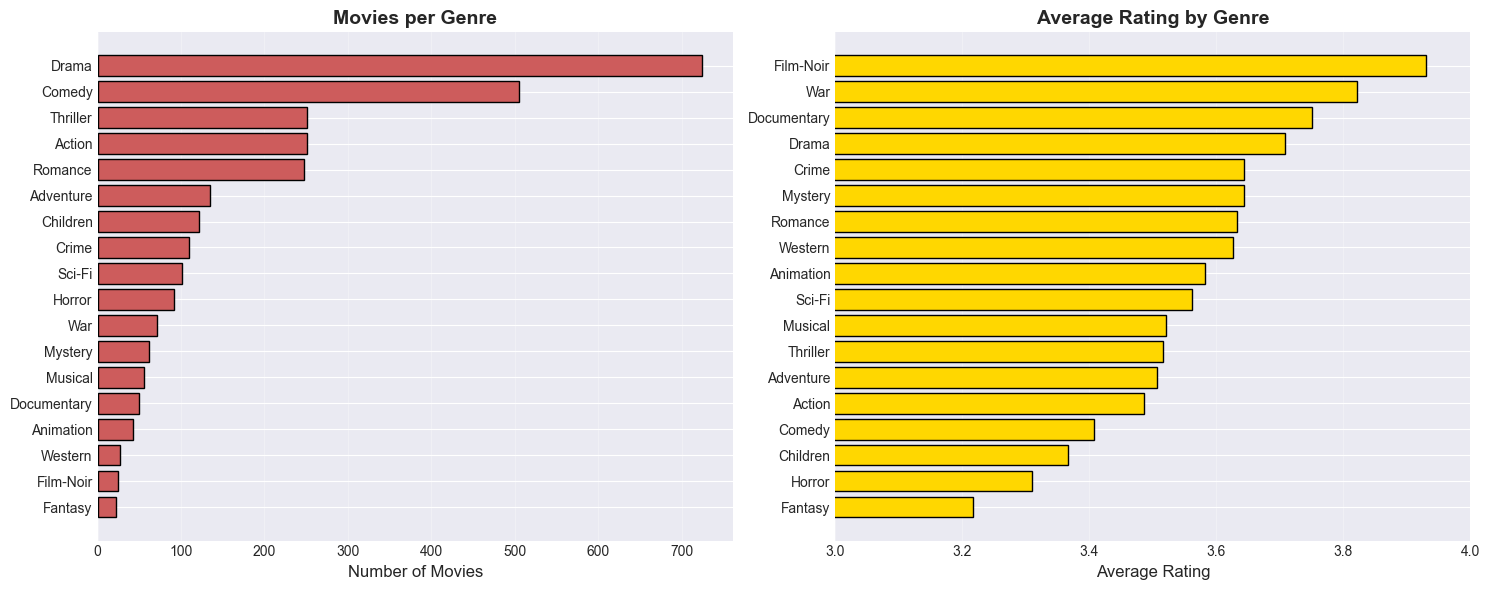

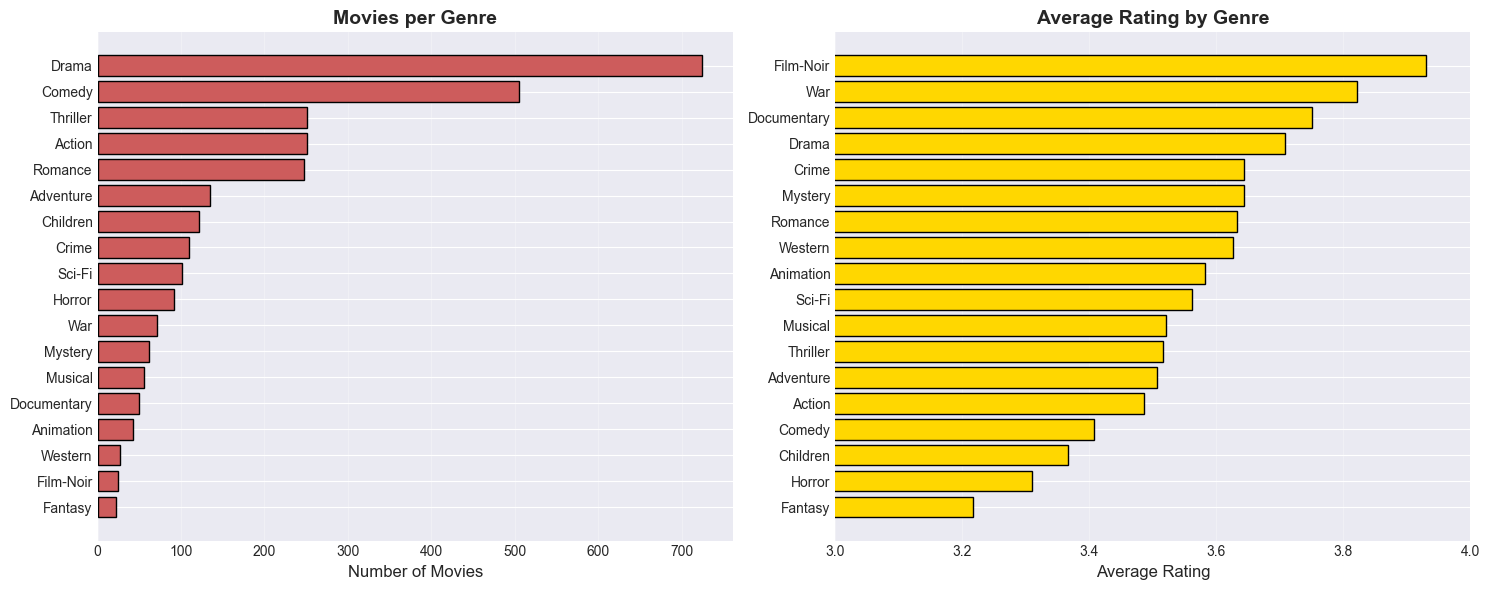

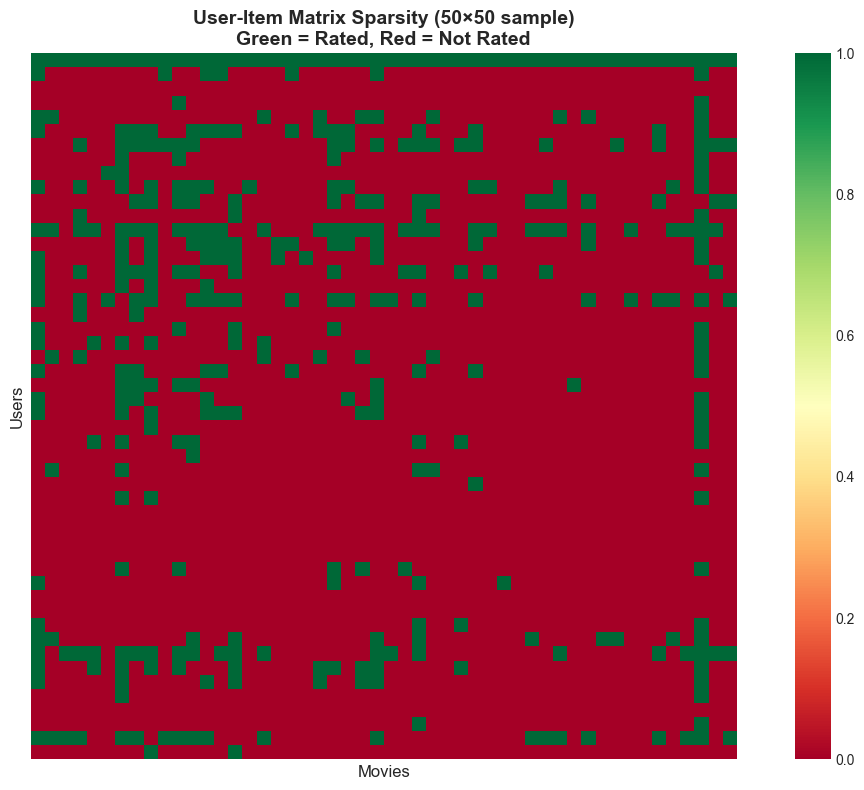

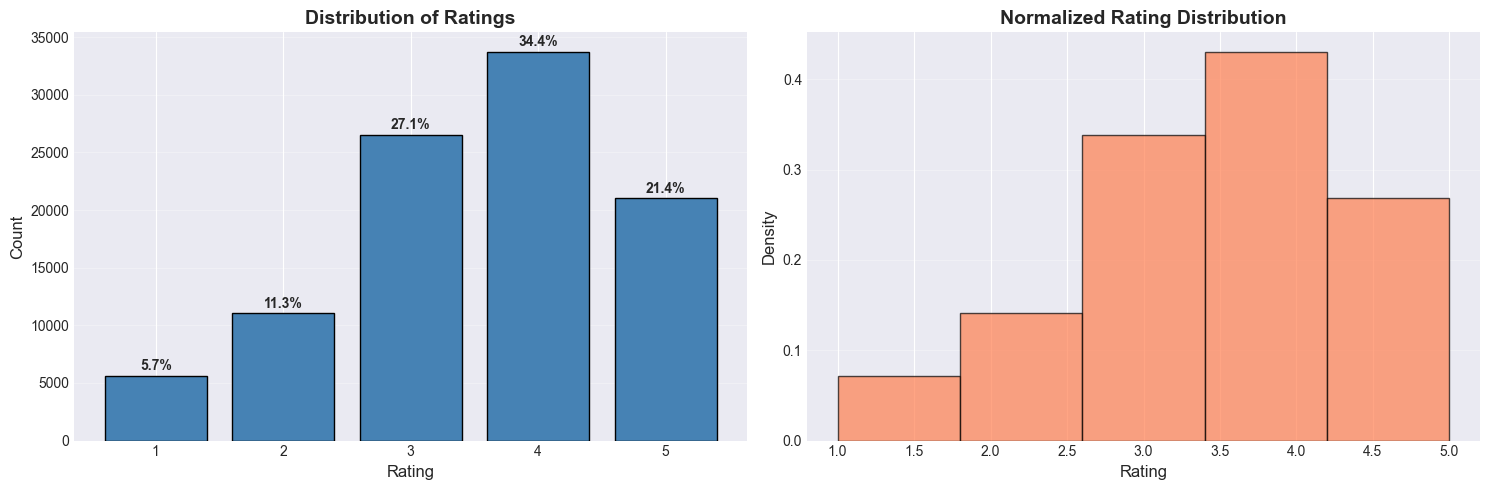


📊 Key Insight: Most ratings are 4 stars
   - Positive bias: 55.9% are 4+ stars


In [23]:
# %% [markdown]
# ## 3. Rating Distribution Analysis

# %%
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Rating distribution
rating_counts = ratings['rating'].value_counts().sort_index()
axes[0].bar(rating_counts.index, rating_counts.values, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Rating', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Distribution of Ratings', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add percentage labels
total = len(ratings)
for i, v in rating_counts.items():
    axes[0].text(i, v + 500, f'{v/total*100:.1f}%', ha='center', fontweight='bold')

# Rating distribution (normalized)
axes[1].hist(ratings['rating'], bins=5, color='coral', edgecolor='black', density=True, alpha=0.7)
axes[1].set_xlabel('Rating', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].set_title('Normalized Rating Distribution', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Key Insight: Most ratings are {rating_counts.idxmax()} stars")
print(f"   - Positive bias: {(ratings['rating'] >= 4).mean()*100:.1f}% are 4+ stars")



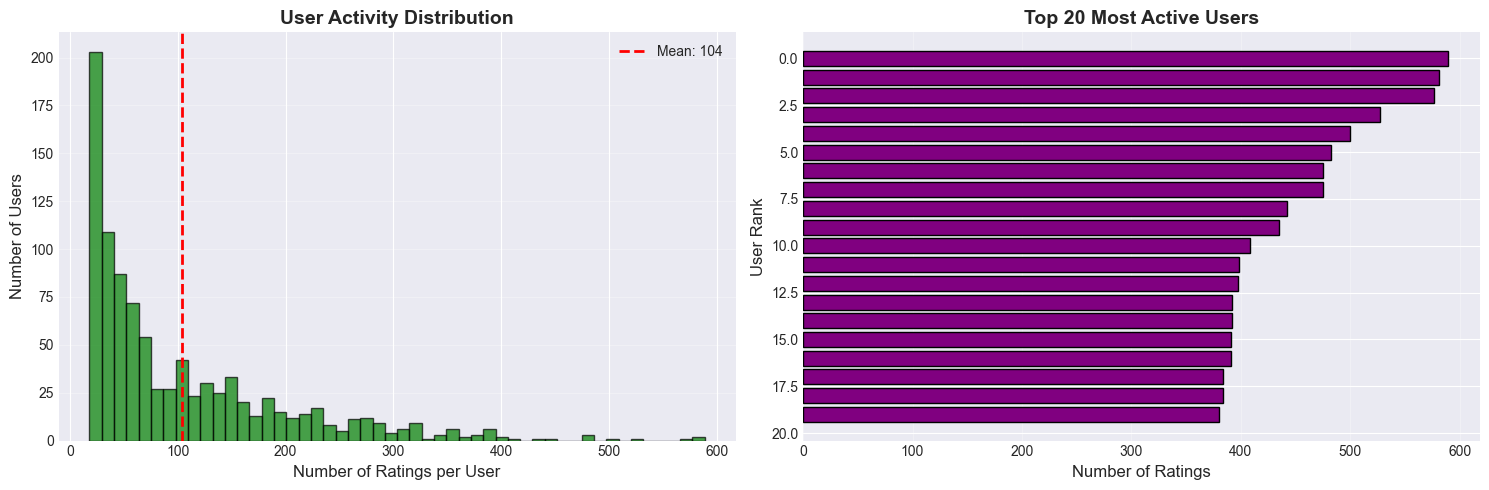


📊 User Activity Statistics:
   - Mean ratings per user: 103.9
   - Median ratings per user: 64.0
   - Most active user: 589 ratings
   - Least active user: 18 ratings


In [24]:
# %% [markdown]
# ## 4. User Behavior Analysis

# %%
# Ratings per user
user_activity = ratings.groupby('user_id').size().reset_index(name='num_ratings')

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of user activity
axes[0].hist(user_activity['num_ratings'], bins=50, color='green', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Ratings per User', fontsize=12)
axes[0].set_ylabel('Number of Users', fontsize=12)
axes[0].set_title('User Activity Distribution', fontsize=14, fontweight='bold')
axes[0].axvline(user_activity['num_ratings'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Mean: {user_activity["num_ratings"].mean():.0f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Top 20 most active users
top_users = user_activity.nlargest(20, 'num_ratings')
axes[1].barh(range(len(top_users)), top_users['num_ratings'], color='purple', edgecolor='black')
axes[1].set_xlabel('Number of Ratings', fontsize=12)
axes[1].set_ylabel('User Rank', fontsize=12)
axes[1].set_title('Top 20 Most Active Users', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 User Activity Statistics:")
print(f"   - Mean ratings per user: {user_activity['num_ratings'].mean():.1f}")
print(f"   - Median ratings per user: {user_activity['num_ratings'].median():.1f}")
print(f"   - Most active user: {user_activity['num_ratings'].max()} ratings")
print(f"   - Least active user: {user_activity['num_ratings'].min()} ratings")



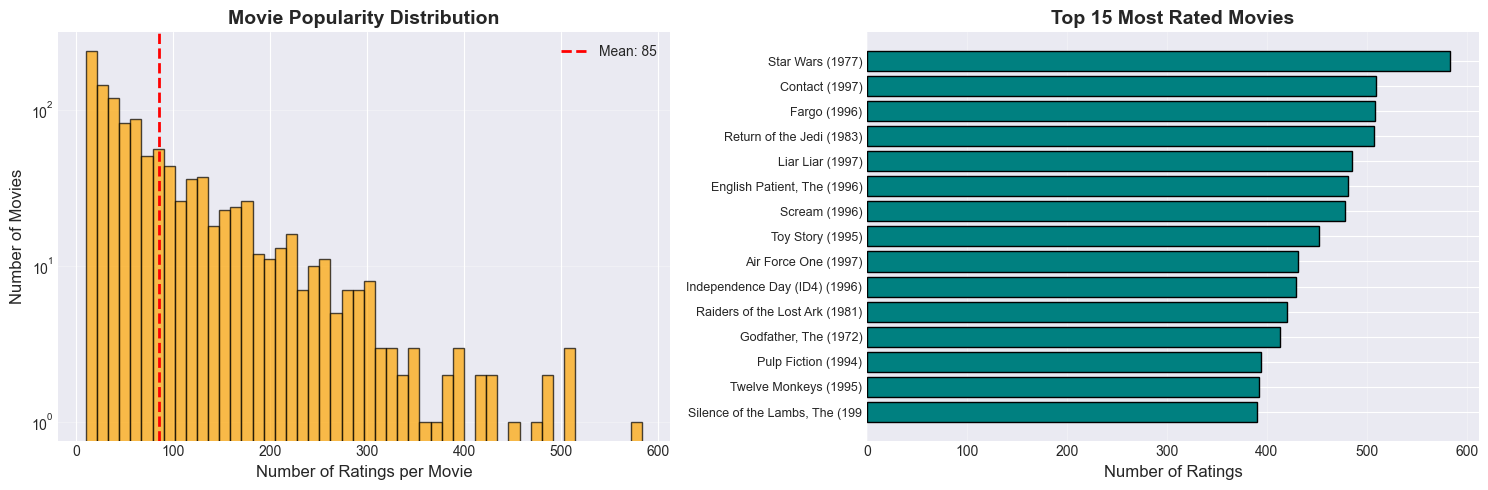


📊 Top 5 Most Rated Movies:
   Star Wars (1977): 583 ratings (avg: 4.36)
   Contact (1997): 509 ratings (avg: 3.80)
   Fargo (1996): 508 ratings (avg: 4.16)
   Return of the Jedi (1983): 507 ratings (avg: 4.01)
   Liar Liar (1997): 485 ratings (avg: 3.16)


In [25]:
# %% [markdown]
# ## 5. Movie Popularity Analysis

# %%
# Ratings per movie
movie_popularity = ratings.groupby('movie_id').agg({
    'rating': ['count', 'mean']
}).reset_index()
movie_popularity.columns = ['movie_id', 'num_ratings', 'avg_rating']

# Merge with movie titles
movie_popularity = movie_popularity.merge(movies[['movie_id', 'title']], on='movie_id')

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Movie popularity distribution
axes[0].hist(movie_popularity['num_ratings'], bins=50, color='orange', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Ratings per Movie', fontsize=12)
axes[0].set_ylabel('Number of Movies', fontsize=12)
axes[0].set_title('Movie Popularity Distribution', fontsize=14, fontweight='bold')
axes[0].axvline(movie_popularity['num_ratings'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Mean: {movie_popularity["num_ratings"].mean():.0f}')
axes[0].legend()
axes[0].set_yscale('log')
axes[0].grid(axis='y', alpha=0.3)

# Top 15 most rated movies
top_movies = movie_popularity.nlargest(15, 'num_ratings')
axes[1].barh(range(len(top_movies)), top_movies['num_ratings'], color='teal', edgecolor='black')
axes[1].set_yticks(range(len(top_movies)))
axes[1].set_yticklabels([title[:30] for title in top_movies['title']], fontsize=9)
axes[1].set_xlabel('Number of Ratings', fontsize=12)
axes[1].set_title('Top 15 Most Rated Movies', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Top 5 Most Rated Movies:")
for idx, row in top_movies.head().iterrows():
    print(f"   {row['title']}: {row['num_ratings']} ratings (avg: {row['avg_rating']:.2f})")



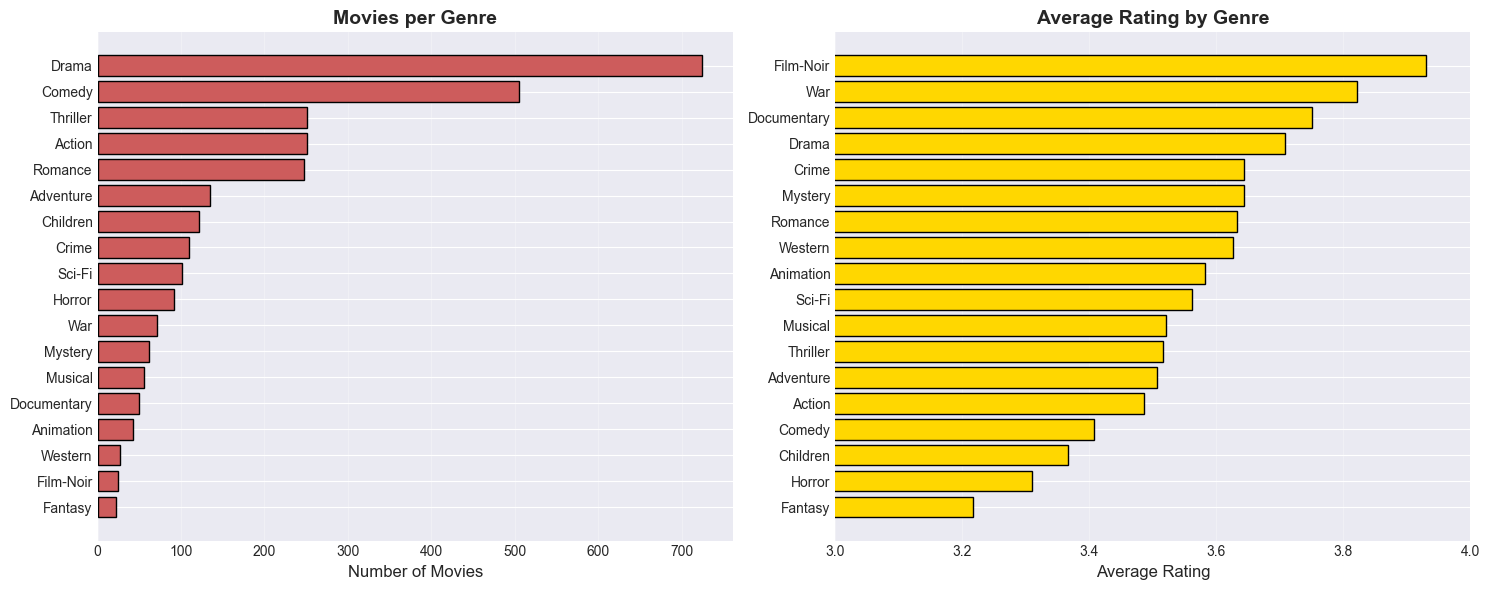


📊 Most Common Genre: Drama (725 movies)
📊 Highest Rated Genre: Film-Noir (3.93 avg)


In [26]:
# %% [markdown]
# ## 6. Genre Analysis

# %%
# Extract genre columns
genre_columns = [col for col in movies.columns if col not in 
                 ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url', 'unknown']]

# Count movies per genre
genre_counts = movies[genre_columns].sum().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Genre frequency
axes[0].barh(range(len(genre_counts)), genre_counts.values, color='indianred', edgecolor='black')
axes[0].set_yticks(range(len(genre_counts)))
axes[0].set_yticklabels(genre_counts.index, fontsize=10)
axes[0].set_xlabel('Number of Movies', fontsize=12)
axes[0].set_title('Movies per Genre', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Average rating per genre
genre_ratings = []
for genre in genre_columns:
    genre_movies = movies[movies[genre] == 1]['movie_id']
    genre_avg = ratings[ratings['movie_id'].isin(genre_movies)]['rating'].mean()
    genre_ratings.append(genre_avg)

genre_rating_df = pd.DataFrame({'genre': genre_columns, 'avg_rating': genre_ratings}).sort_values('avg_rating', ascending=False)

axes[1].barh(range(len(genre_rating_df)), genre_rating_df['avg_rating'], color='gold', edgecolor='black')
axes[1].set_yticks(range(len(genre_rating_df)))
axes[1].set_yticklabels(genre_rating_df['genre'], fontsize=10)
axes[1].set_xlabel('Average Rating', fontsize=12)
axes[1].set_title('Average Rating by Genre', fontsize=14, fontweight='bold')
axes[1].set_xlim(3.0, 4.0)
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Most Common Genre: {genre_counts.idxmax()} ({genre_counts.max()} movies)")
print(f"📊 Highest Rated Genre: {genre_rating_df.iloc[0]['genre']} ({genre_rating_df.iloc[0]['avg_rating']:.2f} avg)")



USER-ITEM MATRIX SPARSITY
Matrix dimensions: 943 users × 1,152 movies
Total possible entries: 1,086,336
Filled entries: 97,953
Sparsity: 90.98%


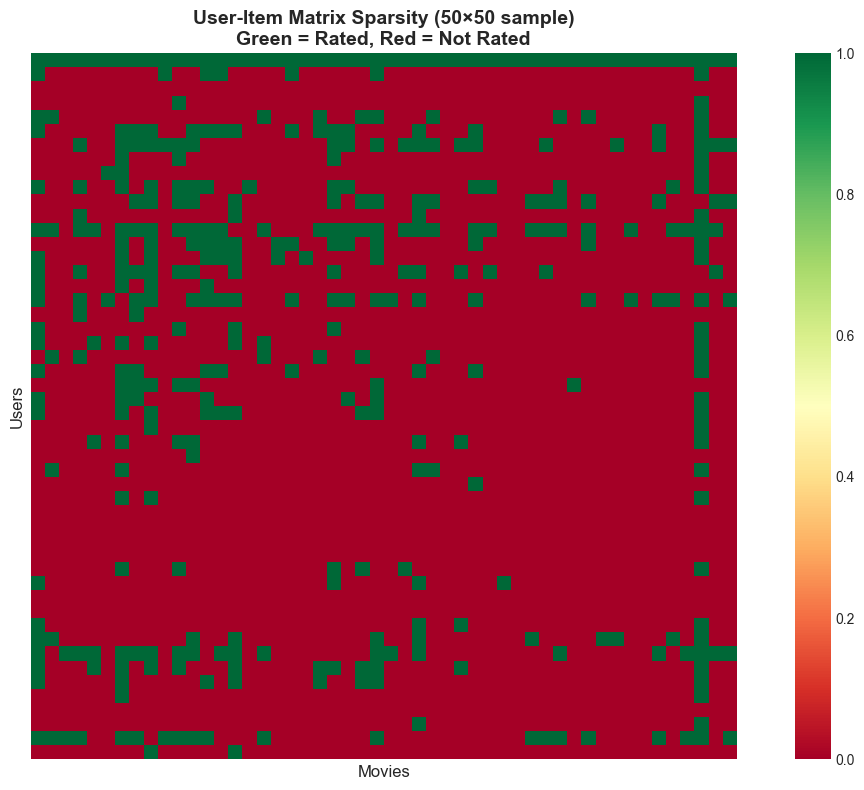

In [27]:
# %% [markdown]
# ## 7. Sparsity Analysis

# %%
# Load user-item matrix
matrix = pd.read_csv(config.PROCESSED_DATA_DIR / 'user_item_matrix.csv', index_col=0)

total_entries = matrix.shape[0] * matrix.shape[1]
filled_entries = matrix.notna().sum().sum()
sparsity = 1 - (filled_entries / total_entries)

print(f"=" * 60)
print(f"USER-ITEM MATRIX SPARSITY")
print(f"=" * 60)
print(f"Matrix dimensions: {matrix.shape[0]:,} users × {matrix.shape[1]:,} movies")
print(f"Total possible entries: {total_entries:,}")
print(f"Filled entries: {filled_entries:,}")
print(f"Sparsity: {sparsity*100:.2f}%")
print(f"=" * 60)

# Visualize sparsity (sample)
fig, ax = plt.subplots(figsize=(12, 8))
sample_matrix = matrix.iloc[:50, :50].notna().astype(int)
sns.heatmap(sample_matrix, cmap='RdYlGn', cbar=True, square=True, 
            xticklabels=False, yticklabels=False, ax=ax)
ax.set_title('User-Item Matrix Sparsity (50×50 sample)\nGreen = Rated, Red = Not Rated', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Movies', fontsize=12)
ax.set_ylabel('Users', fontsize=12)
plt.tight_layout()
plt.show()



In [28]:
# %% [markdown]
# ## 8. Key Insights & Next Steps
# 
# ### 🔍 Key Findings:
# 1. **Rating Bias**: Users tend to rate movies positively (4+ stars)
# 2. **Power Law**: Few movies are very popular, most have few ratings
# 3. **Sparsity**: ~93% of user-movie pairs are unobserved → Cold start problem
# 4. **Active Users**: Some users rate 100+ movies, most rate ~100
# 5. **Genre Diversity**: Drama and Comedy dominate the dataset
# 
# ### 🎯 Implications for Modeling:
# - ✅ Use collaborative filtering for active users with many ratings
# - ✅ Use content-based for movies with few ratings (cold start)
# - ✅ Hybrid approach will balance both strengths
# - ✅ Consider popularity bias in evaluation
# 
# ### 📋 Next Steps:
# 1. Build collaborative filtering model (User-User & Item-Item)
# 2. Build content-based model using genres
# 3. Create hybrid recommendation system
# 4. Evaluate with RMSE, Precision@K, Recall@K
# 5. Deploy with Streamlit dashboard

print("\n✅ EDA Complete! Ready to build models.")


✅ EDA Complete! Ready to build models.
